# College application status

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#For applying models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.fillna(0.00,inplace=True)

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot:xlabel='status', ylabel='count'>

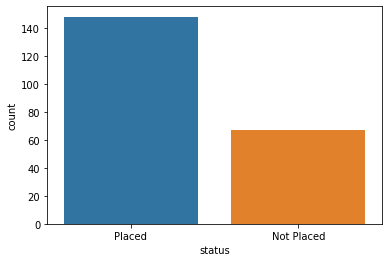

In [ ]:
sns.countplot(x=df['status'])

In [ ]:
df2=df[df.status=='Placed']
df3=df[df.status=='Not Placed']

In [ ]:
def change(data):
    if data<50.00:
        return 1
    elif data>=50.00 and data<60.00:
        return 2
    elif data>=60.00 and data<70.00:
        return 3
    elif data>=70.00 and data<80.00:
        return 4
    else:
        return 5
    
df['10_percent']=df.ssc_p.apply(change)
df['12_percent']=df.hsc_p.apply(change)
df['degree_percent']=df.degree_p.apply(change)
df['etest_percent']=df.etest_p.apply(change)
df['mba_percent']=df.mba_p.apply(change)

In [ ]:
df.drop(['ssc_p','hsc_p','hsc_p','degree_p','etest_p','mba_p'],axis=1,inplace=True)

## Classifying data

In [ ]:
#For applying models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#converting categorical variables
from sklearn.preprocessing import LabelEncoder

# this will transform multi-class worded variables into numerical groups (0, 1, 2, etc.)
s=df.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)

encoder=LabelEncoder()
for cols in object_cols:
    df[cols]=encoder.fit_transform(df[cols]) 

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [ ]:
# will make the 1st colum become the index of the data frame
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary,10_percent,12_percent,degree_percent,etest_percent,mba_percent
sl_no,,,,,,,,,,,,,,
1,1,1,1,1,2,0,1,1,270000.0,3,5,2,2,2
2,1,0,1,2,2,1,0,1,200000.0,4,4,4,5,3
3,1,0,0,0,0,0,0,1,250000.0,3,3,3,4,2
4,1,0,0,2,2,0,1,0,0.0,2,2,2,3,2
5,1,0,0,1,0,0,0,1,425000.0,5,4,4,5,2


In [ ]:
y=df['status']
y.head()

sl_no
1    1
2    1
3    1
4    0
5    1
Name: status, dtype: int64

In [ ]:
x = df
x.drop(['status'], axis = 1, inplace = False)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,salary,10_percent,12_percent,degree_percent,etest_percent,mba_percent
sl_no,,,,,,,,,,,,,
1,1,1,1,1,2,0,1,270000.0,3,5,2,2,2
2,1,0,1,2,2,1,0,200000.0,4,4,4,5,3
3,1,0,0,0,0,0,0,250000.0,3,3,3,4,2
4,1,0,0,2,2,0,1,0.0,2,2,2,3,2
5,1,0,0,1,0,0,0,425000.0,5,4,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,1,1,0,0,0,400000.0,5,5,4,5,4
212,1,1,1,2,2,0,0,275000.0,2,3,4,4,2
213,1,1,1,1,0,1,0,295000.0,3,3,4,2,3


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y, model.predict(x))

array([[ 67,   0],
       [  0, 148]])

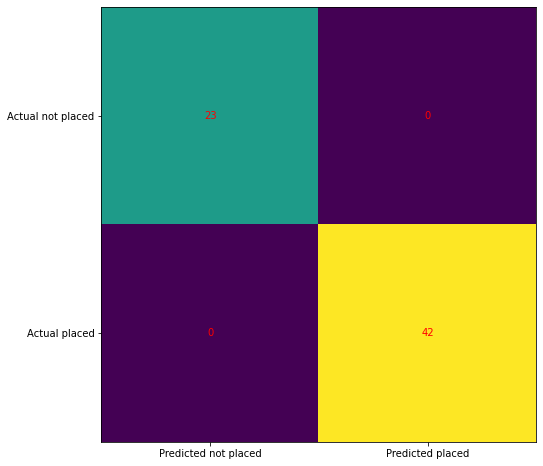

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted not placed', 'Predicted placed'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual not placed', 'Actual placed'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


ImportError: cannot import name 'LabelEncoder' from 'sklearn' (/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/__init__.py)

Testing whether it would be possible to predict gender based on preferences.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('preferences_gender.csv')
s=df.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)

encoder=LabelEncoder()
for cols in object_cols:
    df[cols]=encoder.fit_transform(df[cols]) 
df.head()

['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink', 'Gender']


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [ ]:
y = df['Gender']
X = df.drop(['Gender'], axis = 1, inplace = False)
X.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,6,3,0
1,1,2,3,1
2,2,6,5,1
3,2,1,4,2
4,0,6,3,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6296296296296297

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, model.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[8 4]
 [6 9]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.69      0.60      0.64        15

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.64      0.63      0.63        27



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>